c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 

Pilota analizzato: LEC (P1.0)
Nessun pilota davanti (primo in classifica)
Pilota dietro: PIA (P2.0)


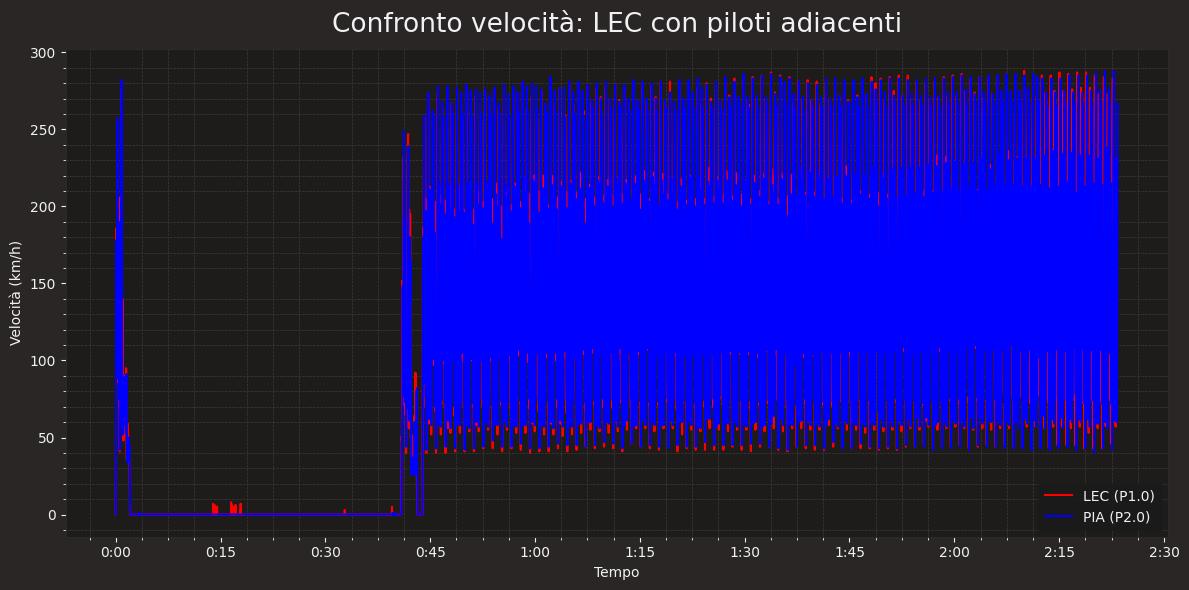

In [7]:
import fastf1
import fastf1.plotting
from fastf1.core import Laps
import pandas as pd
import matplotlib.pyplot as plt

# Configurazione iniziale
fastf1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati
fastf1.plotting.setup_mpl()

def get_adjacent_drivers_times(year, event_name, session_type, driver_code):
    """
    Ottiene i tempi dei piloti adiacenti a un pilota specifico in una sessione.
    
    Args:
        year (int): Anno della gara
        event_name (str): Nome dell'evento (es. 'Monza')
        session_type (str): Tipo di sessione (es. 'Race', 'Qualifying')
        driver_code (str): Codice del pilota (es. 'HAM')
    
    Returns:
        dict: Dizionario con i dati dei piloti adiacenti
    """
    # Carica la sessione
    session = fastf1.get_session(year, event_name, session_type)
    session.load()
    
    # Ottieni i risultati della gara
    results = session.results
    results = results[['Position', 'Abbreviation', 'Time']].sort_values('Position')
    
    # Trova la posizione del pilota specificato
    driver_pos = results[results['Abbreviation'] == driver_code]['Position'].values[0]
    
    # Trova i piloti adiacenti
    ahead_driver = results[results['Position'] == driver_pos - 1]
    behind_driver = results[results['Position'] == driver_pos + 1]
    
    # Ottieni i tempi dei giri per tutti i piloti
    laps = session.laps
    
    # Filtra i giri dei piloti interessati
    driver_laps = laps.pick_driver(driver_code).get_telemetry()
    ahead_laps = laps.pick_driver(ahead_driver['Abbreviation'].values[0]).get_telemetry() if not ahead_driver.empty else None
    behind_laps = laps.pick_driver(behind_driver['Abbreviation'].values[0]).get_telemetry() if not behind_driver.empty else None
    
    return {
        'target_driver': {
            'code': driver_code,
            'position': driver_pos,
            'telemetry': driver_laps
        },
        'ahead_driver': {
            'code': ahead_driver['Abbreviation'].values[0] if not ahead_driver.empty else None,
            'position': driver_pos - 1 if not ahead_driver.empty else None,
            'telemetry': ahead_laps
        },
        'behind_driver': {
            'code': behind_driver['Abbreviation'].values[0] if not behind_driver.empty else None,
            'position': driver_pos + 1 if not behind_driver.empty else None,
            'telemetry': behind_laps
        }
    }

def plot_adjacent_drivers_times(data):
    """
    Crea un grafico con i tempi dei piloti adiacenti.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot del pilota target
    if data['target_driver']['telemetry'] is not None:
        ax.plot(data['target_driver']['telemetry']['Time'], 
                data['target_driver']['telemetry']['Speed'],
                label=f"{data['target_driver']['code']} (P{data['target_driver']['position']})",
                color='red')
    
    # Plot del pilota davanti
    if data['ahead_driver']['telemetry'] is not None:
        ax.plot(data['ahead_driver']['telemetry']['Time'], 
                data['ahead_driver']['telemetry']['Speed'],
                label=f"{data['ahead_driver']['code']} (P{data['ahead_driver']['position']})",
                color='green')
    
    # Plot del pilota dietro
    if data['behind_driver']['telemetry'] is not None:
        ax.plot(data['behind_driver']['telemetry']['Time'], 
                data['behind_driver']['telemetry']['Speed'],
                label=f"{data['behind_driver']['code']} (P{data['behind_driver']['position']})",
                color='blue')
    
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Velocità (km/h)')
    ax.set_title(f"Confronto velocità: {data['target_driver']['code']} con piloti adiacenti")
    ax.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Esempio di utilizzo
if __name__ == "__main__":
    # Specifica gara e pilota
    year = 2024
    event_name = "Monaco"
    session_type = "Race"
    driver_code = "LEC"  # Charles Leclerc
    
    # Ottieni i dati
    data = get_adjacent_drivers_times(year, event_name, session_type, driver_code)
    
    # Stampa informazioni
    print(f"Pilota analizzato: {data['target_driver']['code']} (P{data['target_driver']['position']})")
    if data['ahead_driver']['code']:
        print(f"Pilota davanti: {data['ahead_driver']['code']} (P{data['ahead_driver']['position']})")
    else:
        print("Nessun pilota davanti (primo in classifica)")
    
    if data['behind_driver']['code']:
        print(f"Pilota dietro: {data['behind_driver']['code']} (P{data['behind_driver']['position']})")
    else:
        print("Nessun pilota dietro (ultimo in classifica)")
    
    # Mostra il grafico
    plot_adjacent_drivers_times(data)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Te

Analisi sessione: Race
Pilota analizzato: VER (P6.0, Red Bull Racing)
Pilota davanti: RUS (P5.0, Mercedes)
Pilota dietro: HAM (P7.0, Mercedes)


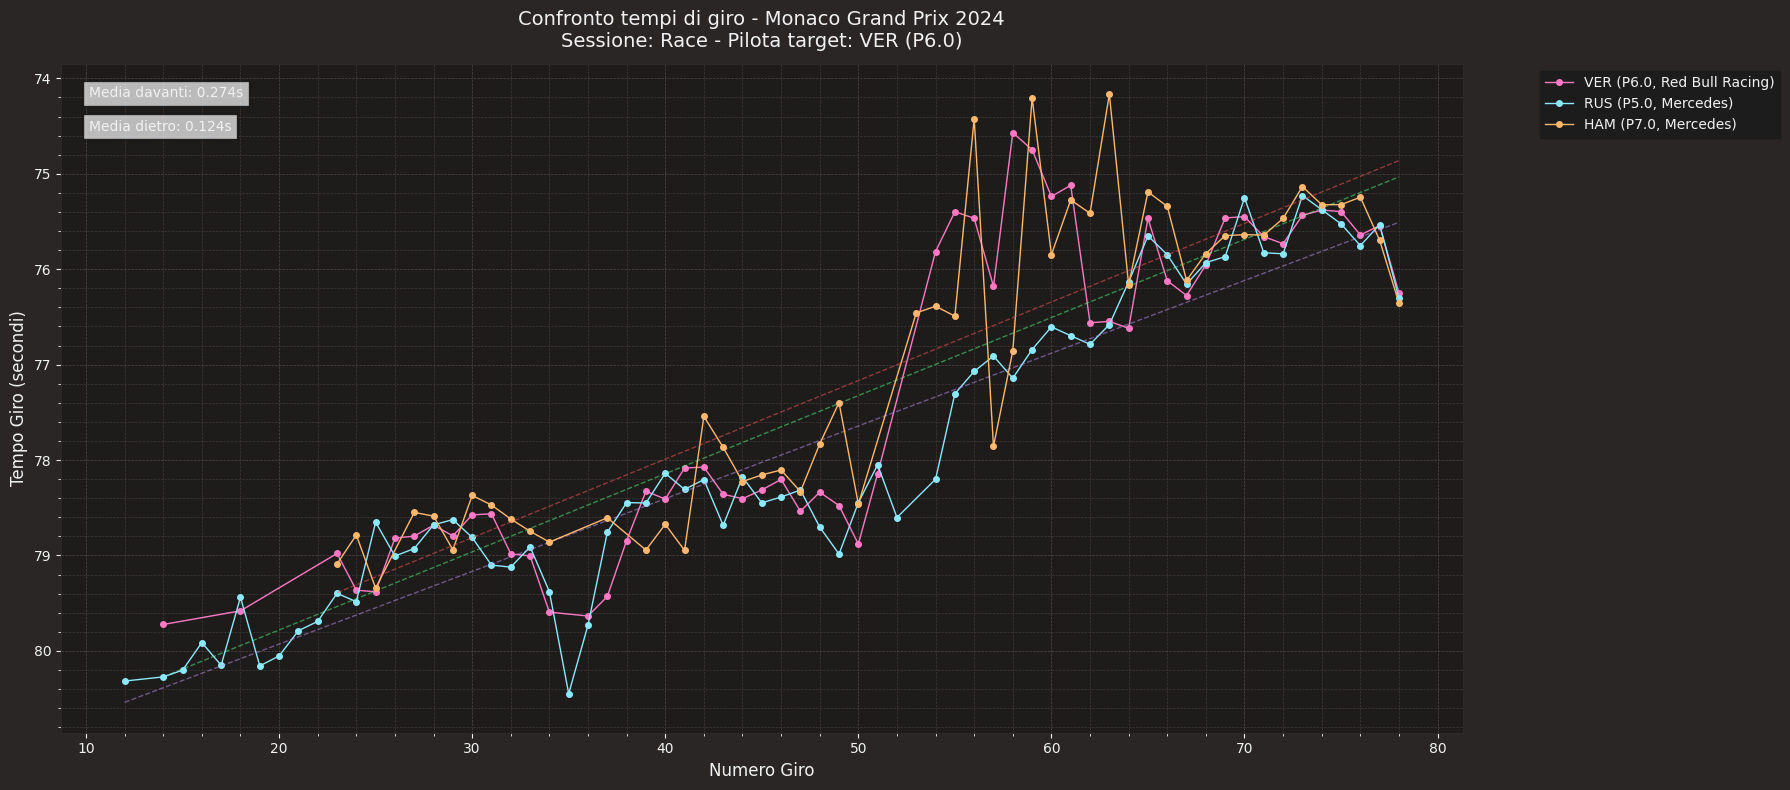

In [20]:
import fastf1
import fastf1.plotting
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# Configurazione iniziale

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

def get_driver_data(year, event_name, session_type, driver_code):
    """
    Ottiene i dati del pilota target e dei piloti adiacenti per l'intera sessione.
    """
    # Carica la sessione
    session = fastf1.get_session(year, event_name, session_type)
    session.load()
    
    # Ottieni i risultati della gara con informazioni sulle scuderie
    results = session.results
    results = results[['Position', 'Abbreviation', 'TeamName', 'Time']].sort_values('Position')
    
    # Trova la posizione del pilota specificato
    driver_row = results[results['Abbreviation'] == driver_code].iloc[0]
    driver_pos = driver_row['Position']
    driver_team = driver_row['TeamName']
    
    # Trova i piloti adiacenti
    ahead_driver = results[results['Position'] == driver_pos - 1].iloc[0] if driver_pos > 1 else None
    behind_driver = results[results['Position'] == driver_pos + 1].iloc[0] if driver_pos < len(results) else None
    
    # Ottieni tutti i giri della sessione per i piloti interessati
    all_laps = session.laps
    
    # Filtra i giri dei piloti interessati
    driver_laps = all_laps.pick_driver(driver_code)
    ahead_laps = all_laps.pick_driver(ahead_driver['Abbreviation']) if ahead_driver is not None else None
    behind_laps = all_laps.pick_driver(behind_driver['Abbreviation']) if behind_driver is not None else None
    
    return {
        'session': session,
        'target_driver': {
            'code': driver_code,
            'position': driver_pos,
            'team': driver_team,
            'laps': driver_laps
        },
        'ahead_driver': {
            'code': ahead_driver['Abbreviation'] if ahead_driver is not None else None,
            'position': driver_pos - 1 if ahead_driver is not None else None,
            'team': ahead_driver['TeamName'] if ahead_driver is not None else None,
            'laps': ahead_laps
        },
        'behind_driver': {
            'code': behind_driver['Abbreviation'] if behind_driver is not None else None,
            'position': driver_pos + 1 if behind_driver is not None else None,
            'team': behind_driver['TeamName'] if behind_driver is not None else None,
            'laps': behind_laps
        }
    }

def plot_full_session_comparison(data):
    """
    Crea un grafico con i tempi di giro per l'intera sessione,
    mostrando il pilota target e i piloti adiacenti.
    """
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Ottieni i colori delle scuderie
    team_colors = fastf1.plotting.TEAM_COLORS
    
    # Preparazione dati per il plotting
    drivers_to_plot = [
        ('target_driver', 'Pilota Target'),
        ('ahead_driver', 'Davanti'),
        ('behind_driver', 'Dietro')
    ]
    
    # Per ogni pilota da plottare
    for driver_key, label_prefix in drivers_to_plot:
        driver_data = data.get(driver_key)  # Usiamo .get() per sicurezza
        
        if driver_data is not None and driver_data.get('laps') is not None and not driver_data['laps'].empty:
            team = driver_data.get('team')
            color = team_colors.get(team)  # Colore di default se non trovato
            
            # Estrai i tempi di giro validi
            valid_laps = driver_data['laps'].pick_quicklaps().pick_accurate()
            
            if not valid_laps.empty:
                # Crea array con il numero di giri e i tempi
                lap_numbers = valid_laps['LapNumber']
                lap_times = valid_laps['LapTime'].dt.total_seconds()
                
                # Plot dei tempi di giro
                ax.plot(lap_numbers, 
                        lap_times,
                        marker='o',
                        markersize=4,
                        linestyle='-',
                        linewidth=1,
                        color=color,
                        label=f"{driver_data.get('code')} (P{driver_data.get('position')}, {team})")
                
                # Aggiungi linea di tendenza
                z = np.polyfit(lap_numbers, lap_times, 1)
                p = np.poly1d(z)
                ax.plot(lap_numbers, p(lap_numbers), 
                        linestyle='--', 
                        linewidth=1, 
                        color=color,
                        alpha=0.5)

    # Configurazione del grafico
    ax.set_xlabel('Numero Giro', fontsize=12)
    ax.set_ylabel('Tempo Giro (secondi)', fontsize=12)
    
    session = data.get('session')
    ax.set_title(f"Confronto tempi di giro - {session.event['EventName']} {session.event.year}\n"
                f"Sessione: {session.name} - Pilota target: {data['target_driver'].get('code')} (P{data['target_driver'].get('position')})", 
                fontsize=14)
    
    ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
    ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Inverti l'asse y per avere i tempi più veloci in alto
    ax.invert_yaxis()
    
    # Aggiungi differenze medie tra i piloti
    if data.get('ahead_driver', {}).get('laps') is not None and not data['ahead_driver']['laps'].empty:
        try:
            avg_diff = calculate_average_gap(data['target_driver']['laps'], data['ahead_driver']['laps'])
            ax.text(0.02, 0.95, f"Media davanti: {avg_diff.get('ahead', 'N/A'):.3f}s", 
                   transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        except Exception as e:
            print(f"Errore nel calcolo della media davanti: {e}")
    
    if data.get('behind_driver', {}).get('laps') is not None and not data['behind_driver']['laps'].empty:
        try:
            avg_diff = calculate_average_gap(data['target_driver']['laps'], data['behind_driver']['laps'])
            ax.text(0.02, 0.90, f"Media dietro: {avg_diff.get('behind', 'N/A'):.3f}s", 
                   transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        except Exception as e:
            print(f"Errore nel calcolo della media dietro: {e}")
    
    plt.tight_layout()
    plt.show()

def calculate_average_gap(reference_laps, compare_laps):
    """
    Calcola la differenza media tra i tempi di giro di due piloti.
    """
    try:
        ref_laps = reference_laps.pick_quicklaps().pick_accurate()
        comp_laps = compare_laps.pick_quicklaps().pick_accurate()
        
        # Trova giri in comune
        common_laps = set(ref_laps['LapNumber']).intersection(set(comp_laps['LapNumber']))
        
        if not common_laps:
            return {'ahead': None, 'behind': None}
        
        # Calcola differenze
        diffs = []
        for lap in common_laps:
            ref_time = ref_laps[ref_laps['LapNumber'] == lap]['LapTime'].iloc[0].total_seconds()
            comp_time = comp_laps[comp_laps['LapNumber'] == lap]['LapTime'].iloc[0].total_seconds()
            diffs.append(comp_time - ref_time)
        
        avg_diff = np.mean(diffs)
        
        return {'ahead': avg_diff if avg_diff > 0 else None,
                'behind': -avg_diff if avg_diff < 0 else None}
    except Exception as e:
        print(f"Errore nel calcolo della differenza media: {e}")
        return {'ahead': None, 'behind': None}

# Esempio di utilizzo
if __name__ == "__main__":
    # Specifica gara e pilota
    year = 2024
    event_name = "Monaco"
    session_type = "Race"
    driver_code = "VER"  # Charles Leclerc
    
    # Ottieni i dati
    data = get_driver_data(year, event_name, session_type, driver_code)
    
    # Stampa informazioni
    print(f"Analisi sessione: {data.get('session').name}")
    print(f"Pilota analizzato: {data.get('target_driver', {}).get('code')} (P{data.get('target_driver', {}).get('position')}, {data.get('target_driver', {}).get('team')})")
    
    if data.get('ahead_driver', {}).get('code'):
        print(f"Pilota davanti: {data['ahead_driver'].get('code')} (P{data['ahead_driver'].get('position')}, {data['ahead_driver'].get('team')})")
    else:
        print("Nessun pilota davanti (primo in classifica)")
    
    if data.get('behind_driver', {}).get('code'):
        print(f"Pilota dietro: {data['behind_driver'].get('code')} (P{data['behind_driver'].get('position')}, {data['behind_driver'].get('team')})")
    else:
        print("Nessun pilota dietro (ultimo in classifica)")
    
    # Mostra il grafico completo
    plot_full_session_comparison(data)

c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 Team Project\FASTF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


Sto scaricando i dati...


core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
c:\Users\domen\OneDrive\Desktop\Develhope\Projects\Github\F1 

Elaborazione e salvataggio dei dati...
Dati salvati in: output\2024_Italian_Grand_Prix_Race_comparison.csv
Generazione del grafico...


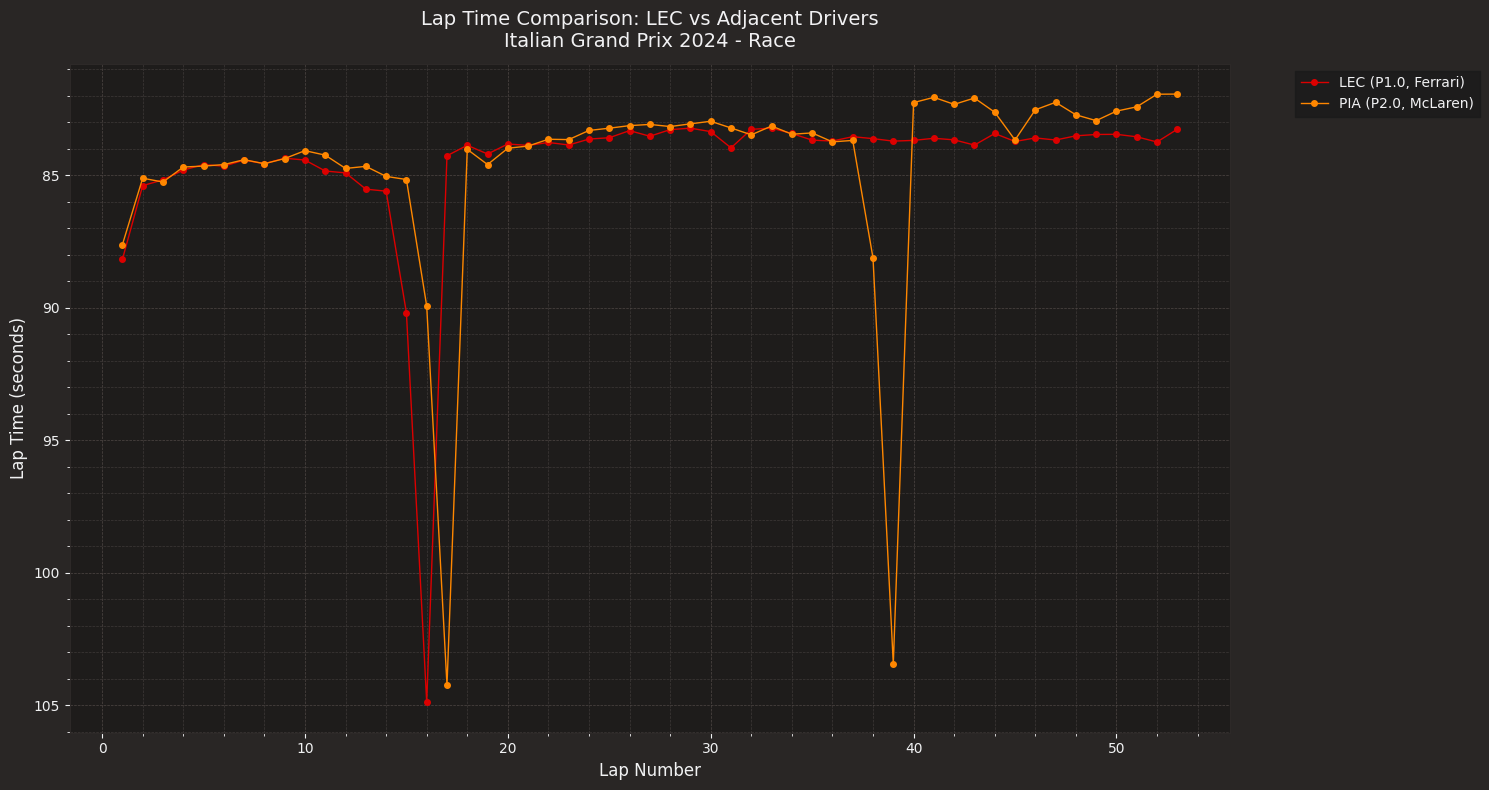

Analisi completata!


In [28]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Configurazione iniziale
fastf1.Cache.enable_cache(r"C:\Users\domen\OneDrive\Desktop\Fast F1")  # Abilita la cache per salvare i dati
fastf1.plotting.setup_mpl()

def get_team_color(team_name):
    """Restituisce il colore della scuderia"""
    team_colors = {
        'Mercedes': '#00D2BE',
        'Red Bull': '#0600EF',
        'Ferrari': '#DC0000',
        'McLaren': '#FF8700',
        'Alpine': '#0090FF',
        'AlphaTauri': '#2B4562',
        'Aston Martin': '#006F62',
        'Alfa Romeo': '#900000',
        'Haas': '#FFFFFF',
        'Williams': '#005AFF'
    }
    return team_colors.get(team_name, '#000000')

def get_driver_data(year, event_name, session_type, driver_code):
    """Ottiene i dati dei piloti target, ahead e behind"""
    session = fastf1.get_session(year, event_name, session_type)
    session.load()
    
    results = session.results
    results = results[['Position', 'Abbreviation', 'TeamName']].sort_values('Position')
    
    driver_row = results[results['Abbreviation'] == driver_code].iloc[0]
    driver_pos = driver_row['Position']
    
    ahead_driver = results[results['Position'] == driver_pos - 1].iloc[0] if driver_pos > 1 else None
    behind_driver = results[results['Position'] == driver_pos + 1].iloc[0] if driver_pos < len(results) else None
    
    # Ottieni i lap times per ogni pilota
    all_laps = session.laps
    
    driver_laps = all_laps.pick_driver(driver_code)[['LapNumber', 'LapTime', 'Team']]
    ahead_laps = all_laps.pick_driver(ahead_driver['Abbreviation'])[['LapNumber', 'LapTime', 'Team']] if ahead_driver is not None else None
    behind_laps = all_laps.pick_driver(behind_driver['Abbreviation'])[['LapNumber', 'LapTime', 'Team']] if behind_driver is not None else None
    
    return {
        'session': session,
        'target': {
            'code': driver_code,
            'position': driver_pos,
            'team': driver_row['TeamName'],
            'laps': driver_laps
        },
        'ahead': {
            'code': ahead_driver['Abbreviation'] if ahead_driver is not None else None,
            'position': driver_pos - 1 if ahead_driver is not None else None,
            'team': ahead_driver['TeamName'] if ahead_driver is not None else None,
            'laps': ahead_laps
        },
        'behind': {
            'code': behind_driver['Abbreviation'] if behind_driver is not None else None,
            'position': driver_pos + 1 if behind_driver is not None else None,
            'team': behind_driver['TeamName'] if behind_driver is not None else None,
            'laps': behind_laps
        }
    }

def merge_and_save_to_csv(data, output_dir='output'):
    """Unisce i dati in un singolo CSV organizzato per timestamp"""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    session = data['session']
    event_name = session.event['EventName']
    session_name = session.name
    year = session.event.year
    
    filename = f"{year}_{event_name.replace(' ', '_')}_{session_name.replace(' ', '_')}_comparison.csv"
    filepath = os.path.join(output_dir, filename)
    
    # Crea un DataFrame vuoto
    merged_df = pd.DataFrame()
    
    # Processa ogni pilota
    for driver_key in ['target', 'ahead', 'behind']:
        driver_data = data[driver_key]
        if driver_data['laps'] is not None and not driver_data['laps'].empty:
            # Crea una copia dei dati
            df = driver_data['laps'].copy()
            
            # Converti LapTime in secondi
            df['LapTime_seconds'] = df['LapTime'].dt.total_seconds()
            
            # Rinomina le colonne con il suffisso del pilota
            suffix = driver_data['code']
            df = df.rename(columns={
                'LapTime': f'LapTime_{suffix}',
                'LapTime_seconds': f'LapTime_seconds_{suffix}',
                'Team': f'Team_{suffix}'
            })
            
            # Unisci al DataFrame principale
            if merged_df.empty:
                merged_df = df.set_index('LapNumber')
            else:
                merged_df = merged_df.join(df.set_index('LapNumber'), how='outer')
    
    # Aggiungi metadati
    merged_df['Event'] = event_name
    merged_df['Session'] = session_name
    merged_df['Year'] = year
    merged_df['Reference_Driver'] = data['target']['code']
    
    # Ordina per numero giro
    merged_df = merged_df.sort_index()
    
    # Salva su CSV
    merged_df.to_csv(filepath, index=True, index_label='LapNumber')
    print(f"Dati salvati in: {filepath}")
    
    return merged_df

def plot_comparison(merged_df, data):
    """Crea un grafico comparativo dei tempi sul giro"""
    fig, ax = plt.subplots(figsize=(15, 8))
    
    target_code = data['target']['code']
    
    for driver_key in ['target', 'ahead', 'behind']:
        driver_data = data[driver_key]
        code = driver_data['code']
        
        if code is not None and f'LapTime_seconds_{code}' in merged_df.columns:
            team = driver_data['team']
            color = get_team_color(team)
            
            # Plot dei tempi di giro
            ax.plot(merged_df.index, 
                    merged_df[f'LapTime_seconds_{code}'],
                    marker='o',
                    markersize=4,
                    linestyle='-',
                    linewidth=1,
                    color=color,
                    label=f"{code} (P{driver_data['position']}, {team})")
    
    ax.set_xlabel('Lap Number', fontsize=12)
    ax.set_ylabel('Lap Time (seconds)', fontsize=12)
    ax.set_title(f"Lap Time Comparison: {target_code} vs Adjacent Drivers\n"
                f"{data['session'].event['EventName']} {data['session'].event.year} - {data['session'].name}", 
                fontsize=14)
    
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Inverti l'asse y per avere i tempi più veloci in alto
    ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Configurazione
    year = 2024
    event_name = "Monza"
    session_type = "Race"
    driver_code = "LEC"  # Charles Leclerc
    
    # Ottieni dati
    print("Sto scaricando i dati...")
    data = get_driver_data(year, event_name, session_type, driver_code)
    
    # Unisci e salva in un unico CSV
    print("Elaborazione e salvataggio dei dati...")
    merged_df = merge_and_save_to_csv(data)
    
    # Mostra grafico
    print("Generazione del grafico...")
    plot_comparison(merged_df, data)
    print("Analisi completata!")